# Imposters

In [1]:
## Imports
from matplotlib import pyplot as plt
import matplotlib.patches as patches
from PIL import Image

import torch
from PIL import Image, ImageDraw, ImageFont
from torchvision import transforms
import urllib
import numpy as np
from matplotlib import pyplot as plt

import PIL
from PIL import Image 
import imagenet_stubs
from imagenet_stubs.imagenet_2012_labels import label_to_name

import seaborn as sns
sns.set_theme(style="whitegrid")

from IPython.display import Image as dImage
device = 'cuda' if torch.cuda.is_available() else 'cpu'
from IPython.display import HTML


In [2]:
%%capture
vgg16 = torch.hub.load('pytorch/vision:v0.6.0', 'vgg16', pretrained=True)
resenet50 = torch.hub.load('pytorch/vision:v0.6.0', 'resnet50', pretrained=True)
resenet152 = torch.hub.load('pytorch/vision:v0.6.0', 'resnet152', pretrained=True)
squeezenet = torch.hub.load('pytorch/vision:v0.6.0', 'squeezenet1_0', pretrained=True)

models = [vgg16, resenet50, resenet152, squeezenet]
[model.to(device).eval()  for model in models]

In [3]:
def show_image_grid(images, multiplier=3, titles=None):
  f, axes = plt.subplots(1, len(images), figsize=(len(images)*multiplier, 10))
  for i in range(len(images)):
    axes[i].imshow(Image.open(images[i]))
    axes[i].grid(None)
    if titles: axes[i].title.set_text(titles[i])

In [4]:
def load_image_to_tensor(input_image):
  pil_img = Image.open(input_image)
  preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
  ])
  input_tensor = preprocess(pil_img.convert('RGB')).to(device)
  input_batch = input_tensor.unsqueeze(0) # A mini-batch
  return input_batch, pil_img

In [5]:
def visualize_predictions(model, input_image, image_title='Image'):
  input_batch, pil_img = load_image_to_tensor(input_image)
  with torch.no_grad():
    output = model(input_batch)
    probs = torch.nn.functional.softmax(output[0], dim=0)

    names_of = [label_to_name(int(x)) for x in  probs.topk(5).indices.cpu().numpy()]
    percents = probs.topk(5).values.cpu().numpy()

  axfiges, axes = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'width_ratios': [2, 1]})
  axes[0].barh([n.split(',')[0] for n in names_of], percents)
  axes[0].axis(xmin=0.0, xmax=1.0)
  axes[0].title.set_text(f'Top 5 Predictions ({model.__class__.__name__ })')
  axes[1].imshow(pil_img)
  axes[1].grid(None)
  axes[1].set_yticklabels([])
  axes[1].set_xticklabels([])
  axes[1].title.set_text(image_title)

  plt.show()

## Textures and Normal Maps

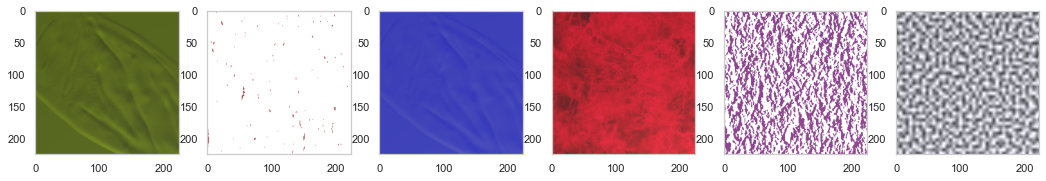

In [6]:
show_image_grid(["Code/samples/textures/A.png", 
                 "Code/samples/textures/B.png", 
                 "Code/samples/textures/C.png", 
                 "Code/samples/textures/E.png", 
                 "Code/samples/textures/F.png", 
                 "Code/samples/textures/G.png"])

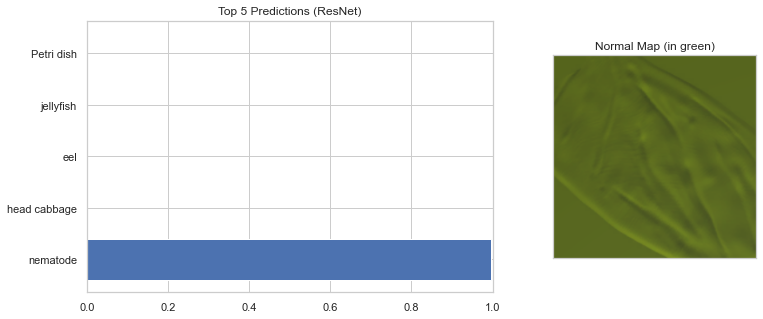

In [7]:
visualize_predictions(model=resenet152, input_image="Code/samples/textures/A.png", image_title='Normal Map (in green)')

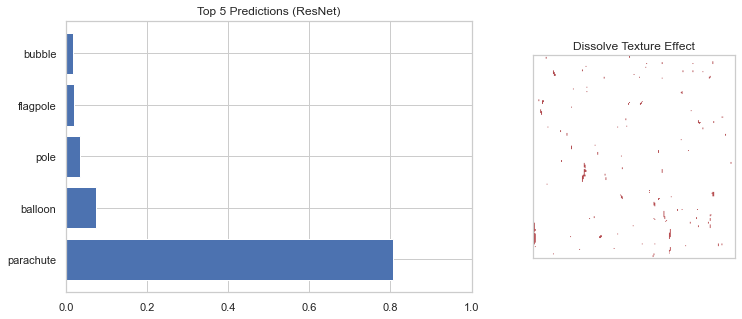

In [8]:
visualize_predictions(model=resenet152, input_image="Code/samples/textures/B.png", image_title='Dissolve Texture Effect')

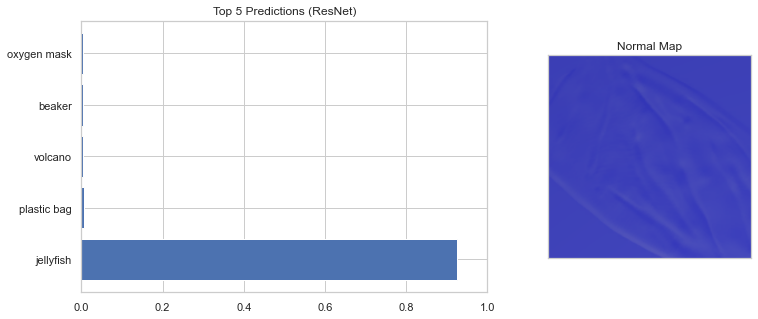

In [9]:
visualize_predictions(model=resenet152, input_image="Code/samples/textures/C.png", image_title='Normal Map')

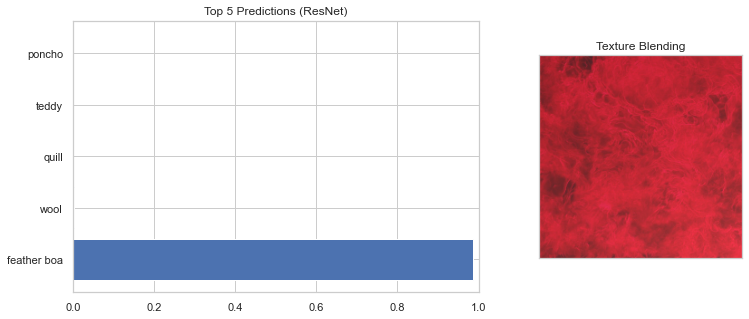

In [10]:
visualize_predictions(model=resenet152, input_image="Code/samples/textures/E.png", image_title='Texture Blending')

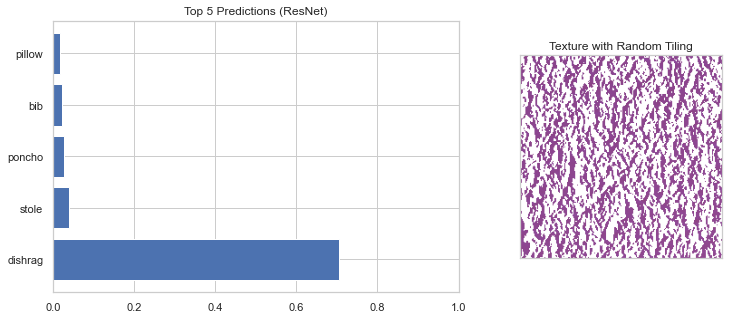

In [11]:
visualize_predictions(model=resenet152, input_image="Code/samples/textures/F.png", image_title='Texture with Random Tiling')

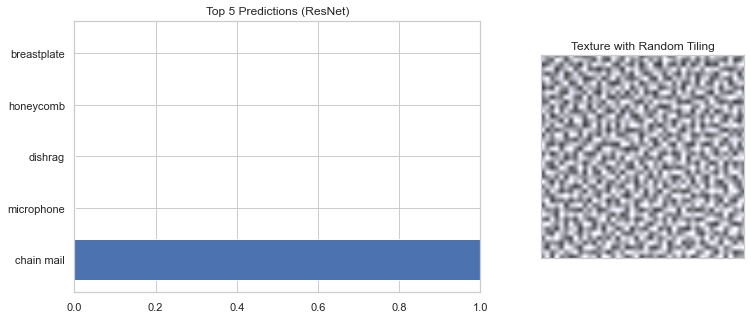

In [12]:
visualize_predictions(model=resenet152, input_image="Code/samples/textures/G.png", image_title='Texture with Random Tiling')

### Turning a Car into Buckle

With material modification and texture tiling, it is possible to force a CNN to misclassify.

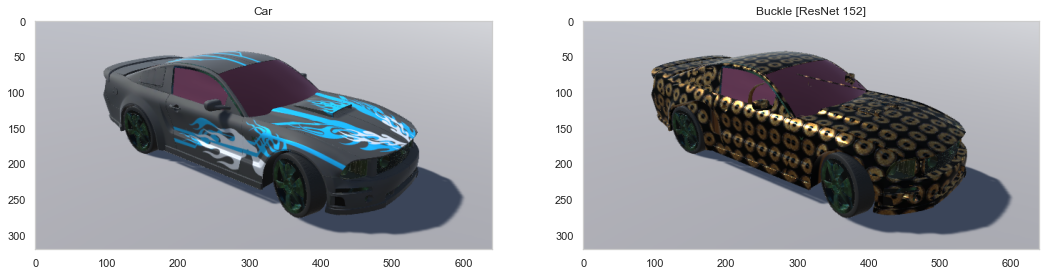

In [13]:
### Normal Car
show_image_grid(["Images/car.png", "Images/car-buckle.png"], multiplier=9, titles=['Car', 'Buckle [ResNet 152]'])

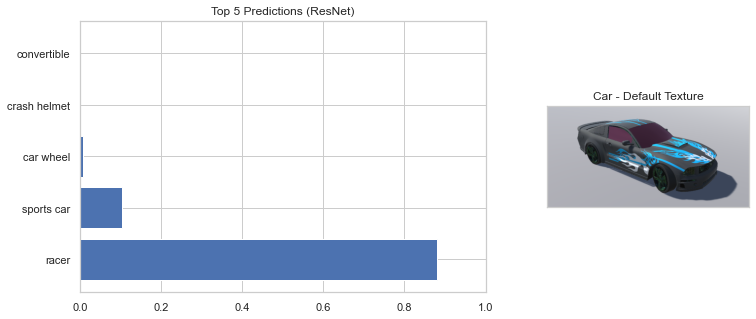

In [14]:
visualize_predictions(model=resenet152, input_image="Code/samples/car/default.png", image_title='Car - Default Texture')

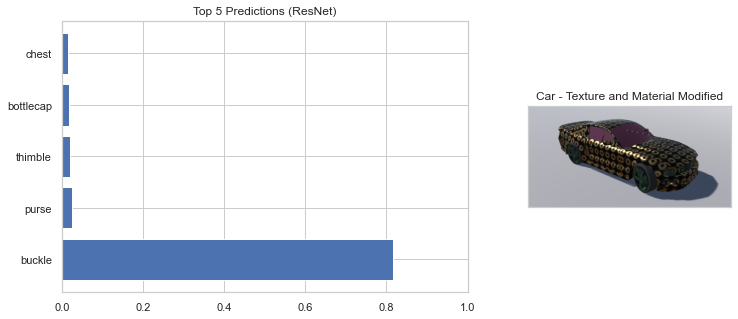

In [15]:
visualize_predictions(model=resenet152, input_image="Code/samples/car/buckle.png", image_title='Car - Texture and Material Modified')

### Lighting

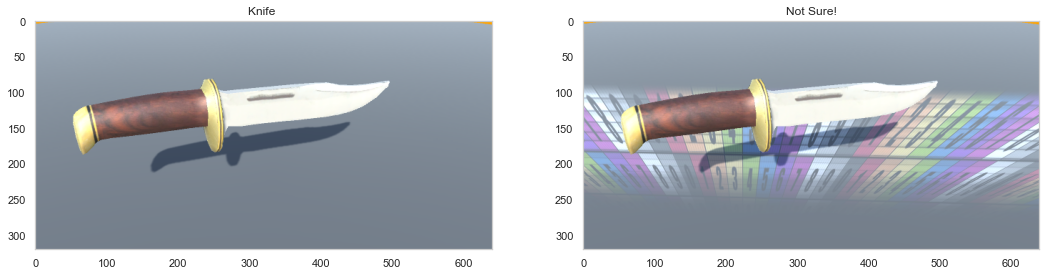

In [16]:
### Normal Car
show_image_grid(["Images/knife.png", "Images/knife-attack.png"], multiplier=9, titles=['Knife ', 'Not Sure!'])

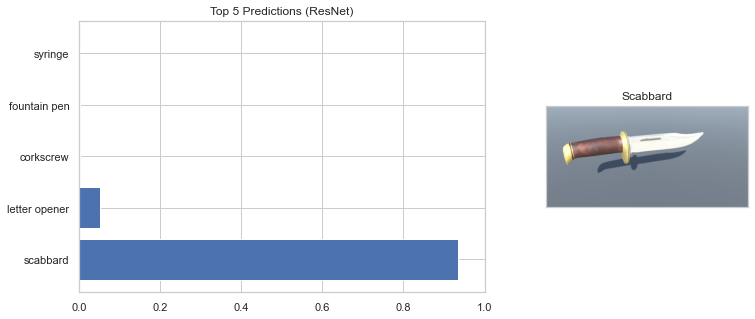

In [17]:
visualize_predictions(model=resenet152, input_image="Code/samples/lighting/sample_1107.png", image_title='Scabbard')

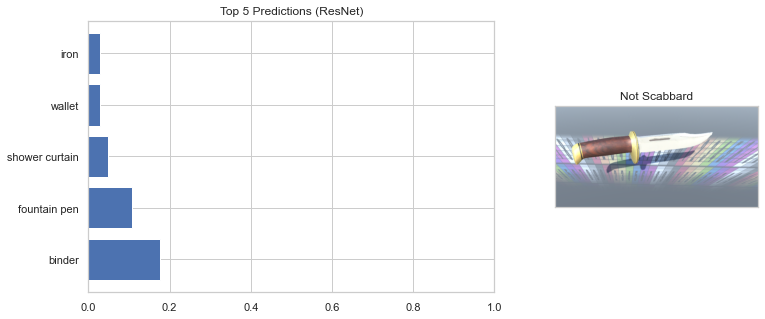

In [18]:
visualize_predictions(model=resenet152, input_image="Code/samples/lighting/sample_1105.png", image_title='Not Scabbard')

### Deformables

**VGG16** Detects some objects in a random mesh deformation animation

![Deformation](Images/deformation.gif)

**Notes**
1. We start with a base mesh and keep deforming it until our neural network sees something. 
1. I also tried object created with [Endless Forms]('http://endlessforms.com/'), My results suggest that CNNs are also struggling to correctly detect those objects as well.

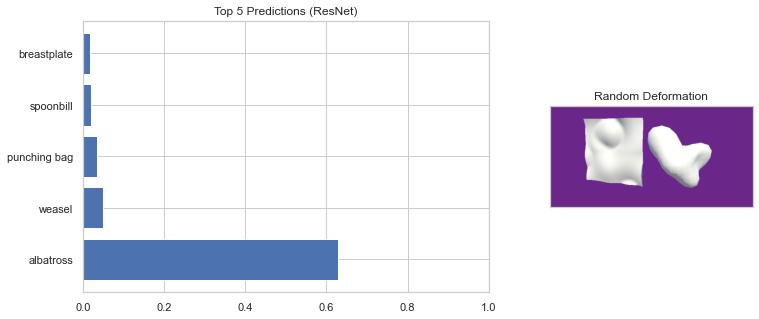

In [19]:
visualize_predictions(model=resenet152, input_image="Code/samples/deformation/sample_1043.png", image_title='Random Deformation')

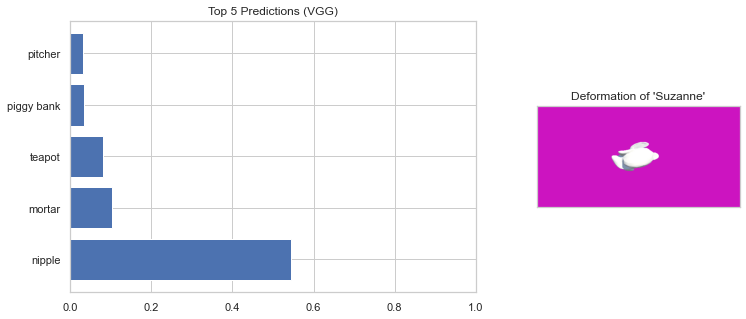

In [20]:
visualize_predictions(model=vgg16, input_image="Code/samples/deformation/sample_1062.png", image_title='Deformation of \'Suzanne\'')

### Meta Balls

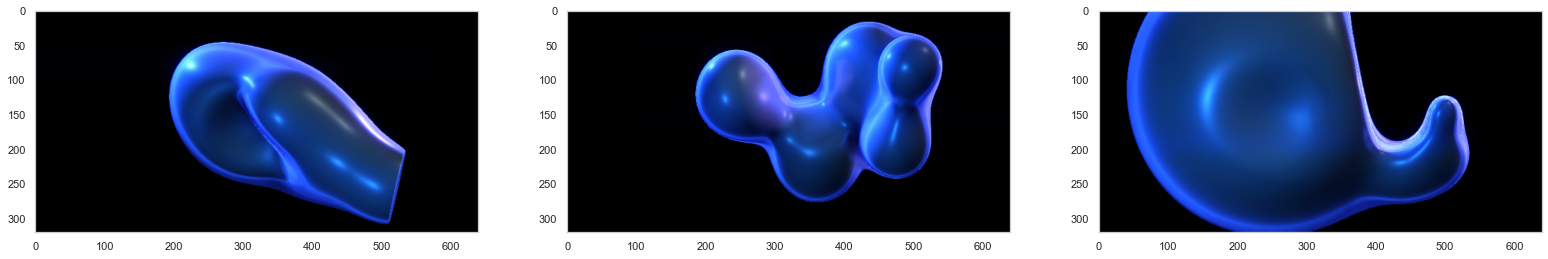

In [21]:
show_image_grid(["Code/samples/metaballs/A.png",
                 "Code/samples/metaballs/B.png",
                 "Code/samples/metaballs/C.png"], multiplier=9)

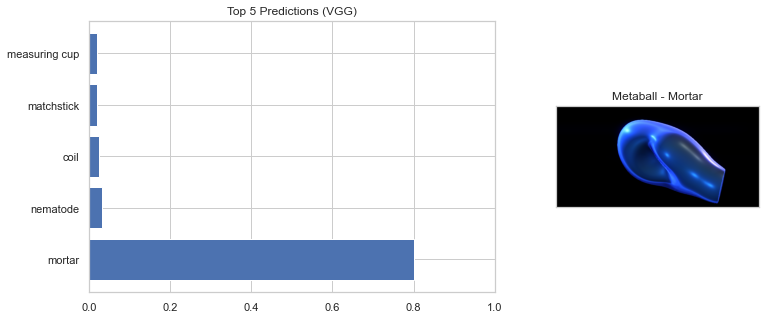

In [22]:
visualize_predictions(model=vgg16, input_image="Code/samples/metaballs/A.png", image_title='Metaball - Mortar')

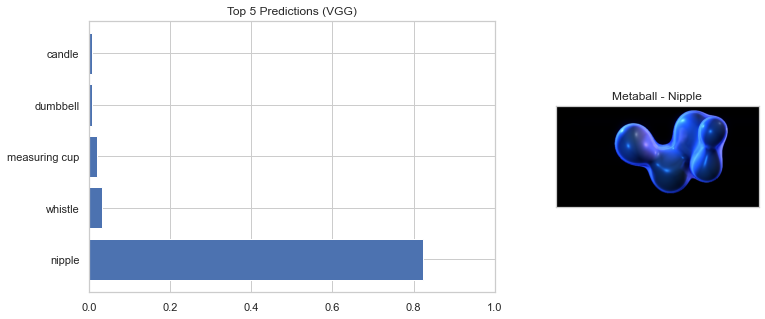

In [23]:
visualize_predictions(model=vgg16, input_image="Code/samples/metaballs/B.png", image_title='Metaball - Nipple')

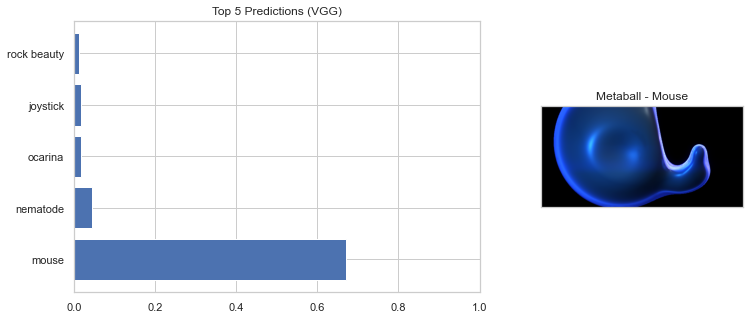

In [24]:
visualize_predictions(model=vgg16, input_image="Code/samples/metaballs/C.png", image_title='Metaball - Mouse')

# Generative Arts

Neural Nets perform strangely when they see abstract generated arts. Patterns in these kinds of images can fool CNNs easily.

In some cases, there are some visual similarities or patterns. For instance, the differential growth or reaction-diffusion algorithms, produce objects that are similar to underwater creatures. That being said, there are some strange cases that the image doesn't represent a similar image to a human, but the neural network classifies them as an object with very high confidence.

**Samples are taken from Youtube**


1. [Generative Art](https://www.youtube.com/watch?v=qtPi0JvmWbs&t=77s&ab_channel=HaoHua)
1. [Computation Growth](https://www.youtube.com/watch?v=9HI8FerKr6Q&ab_channel=deskriptivGbR)

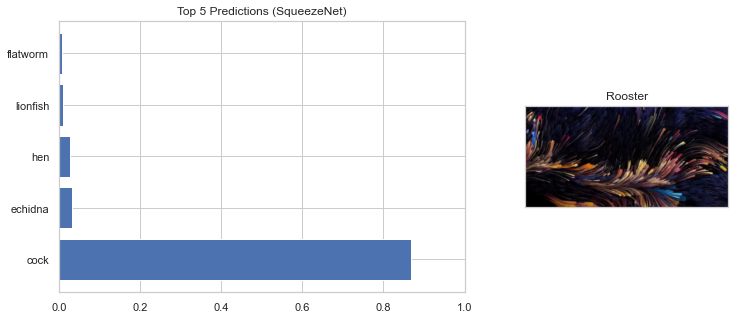

In [25]:
visualize_predictions(model=squeezenet, input_image="Code/samples/gen-art/a.png", image_title='Rooster')

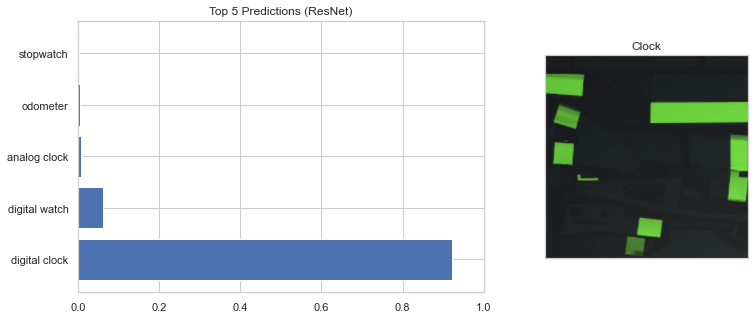

In [26]:
visualize_predictions(model=resenet152, input_image="Code/samples/gen-art/notclock.png", image_title='Clock')

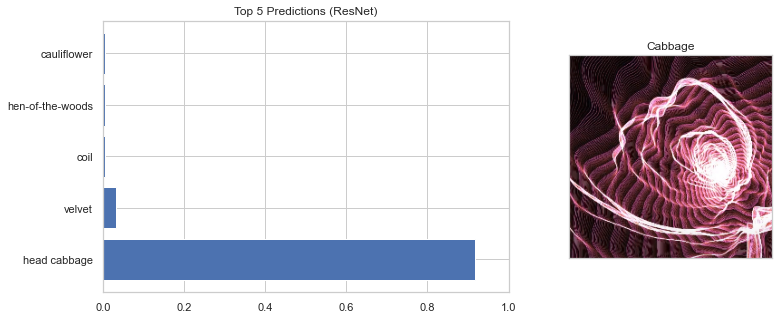

In [27]:
visualize_predictions(model=resenet152, input_image="Code/samples/gen-art/notcabbage.png", image_title='Cabbage')

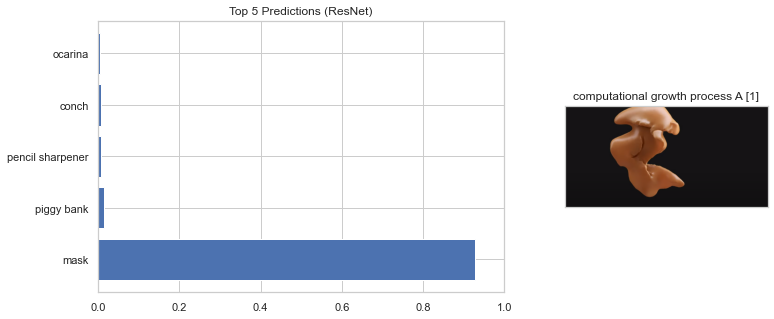

In [28]:
visualize_predictions(model=resenet152, input_image="Code/samples/gen-art/growth-a.png", image_title='computational growth process A [1]')

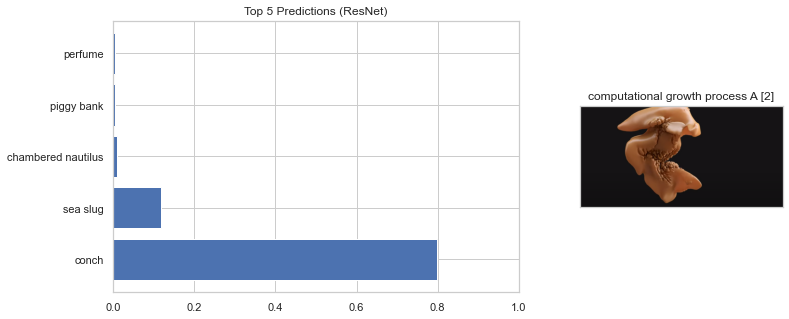

In [29]:
visualize_predictions(model=resenet152, input_image="Code/samples/gen-art/growth-b.png", image_title='computational growth process A [2]')

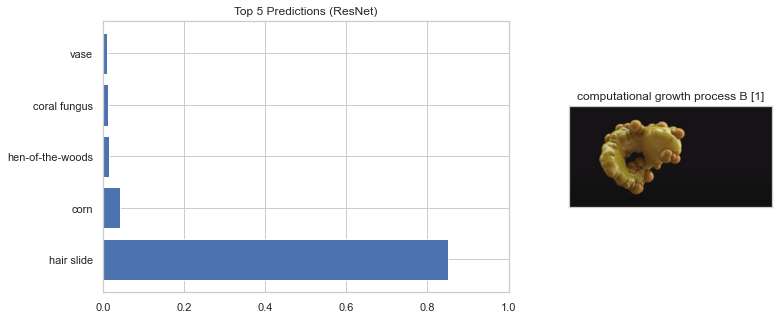

In [30]:
visualize_predictions(model=resenet152, input_image="Code/samples/gen-art/corn-1.png", image_title='computational growth process B [1]')

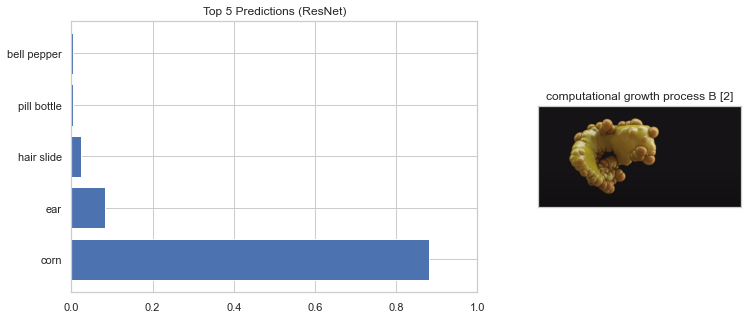

In [31]:
visualize_predictions(model=resenet152, input_image="Code/samples/gen-art/corn-2.png", image_title='computational growth process B [2]')

### 3D Attribution Map 

**This is a very hacky prototype**. First, we capture images from different angles, then we feed that image into a Neural Network and compute its output. After that, we [Grad-CAM](https://github.com/ramprs/grad-cam) for a given image and project it back to the 3D scene. 

In the projection phase, we randomly pick 5000 from the Grad-CAM map and do a Ray Cast into the 3D world to see that points intersect with our object. For each intersection point, we draw a Sphere. We color the sphere with respect to the corresponding point value from Grad-CAM.


**Notes**: 
1. Parts of the Car that is covered with more <span style="color:red">**RED**</span> spheres are the parts that the neural network has an easy time detecting the car. The regions in <span style="color:blue">**BLUE**</span> are where the neural network struggles the most.
1.Currenlty I create a point cloud, It is possible to create a mesh from this point cloud.


![Car HeatMap](Images/heatmap.png)

### See it in Action

In [32]:
HTML('<iframe width="680" height="420" src="https://www.youtube.com/embed/kfMuFpFxSJE" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

### Partial 3D Map for a TV

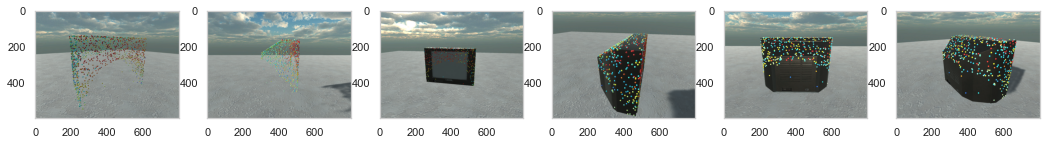

In [33]:
show_image_grid(["Images/TV-Map00.png", 
                 "Images/TV-Map01.png", 
                 "Images/TV-Map1.png", 
                 "Images/TV-Map2.png",
                 "Images/TV-Map3.png",
                 "Images/TV-Map4.png"])

# DE:TR - End-to-End Object Detection with Transformers

Playing with facebook's [DE:TR](https://github.com/facebookresearch/detr)

In [34]:
model = torch.hub.load('facebookresearch/detr', 'detr_resnet101', pretrained=True)
model.eval()
model = model.cuda()

Using cache found in C:\Users\taesiri/.cache\torch\hub\facebookresearch_detr_master


In [35]:
img_to_tensor = transforms.Compose([
  transforms.ToTensor(),
  transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

CLASSES = [
    'N/A', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A',
    'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
    'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack',
    'umbrella', 'N/A', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis',
    'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass',
    'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich',
    'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake',
    'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A',
    'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard',
    'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A',
    'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier',
    'toothbrush'
]

In [36]:
def do_detr_detection(img):
  img_tens = img_to_tensor(img).unsqueeze(0).to(device)

  # To Forward Pass
  with torch.no_grad():
    output = model(img_tens)

  pred_logits=output['pred_logits'][0][:, :len(CLASSES)]
  pred_boxes=output['pred_boxes'][0]

  max_output = pred_logits.softmax(-1).max(-1)
  topk = max_output.values.topk(3)

  pred_logits = pred_logits[topk.indices]
  pred_boxes = pred_boxes[topk.indices]
  
  fig, ax = plt.subplots(1, figsize=(12, 12))
  ax.grid(None)
  ax.imshow(img)

  for logits, box in zip(pred_logits, pred_boxes):
    probs = torch.nn.functional.softmax(pred_logits[0], dim=0).cpu().numpy()
    cls = logits.argmax()

    label = CLASSES[cls]
    
    if probs[cls]*100<80:
        continue
        
    print(f'Detected A {label}: {probs[cls]*100}%')
    box = box.cpu() * torch.Tensor([640, 320, 640, 320]) #Size of Image

    x, y, w, h = box
    x0 = x-w//2
    y0 = y-h//2

    rect = patches.Rectangle((x0, y0), w, h, linewidth=3, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    ax.text(x, y, label, fontsize=30, color='w')

  plt.show()

Detected A car: 89.68431353569031%
Detected A car: 89.68431353569031%
Detected A car: 89.68431353569031%


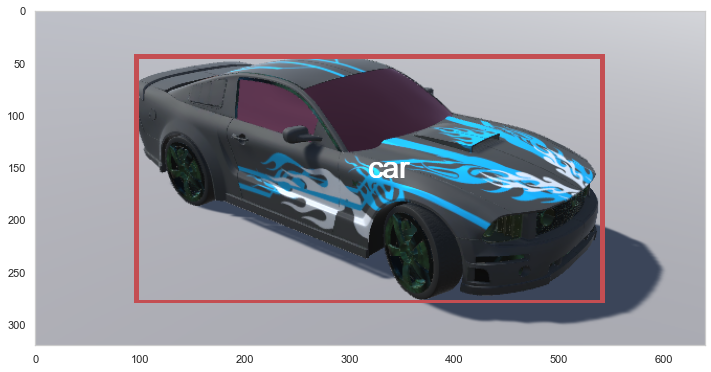

In [37]:
img = Image.open('Images/car.png')
do_detr_detection(img)

Detected A handbag: 98.90370965003967%
Detected A handbag: 98.90370965003967%


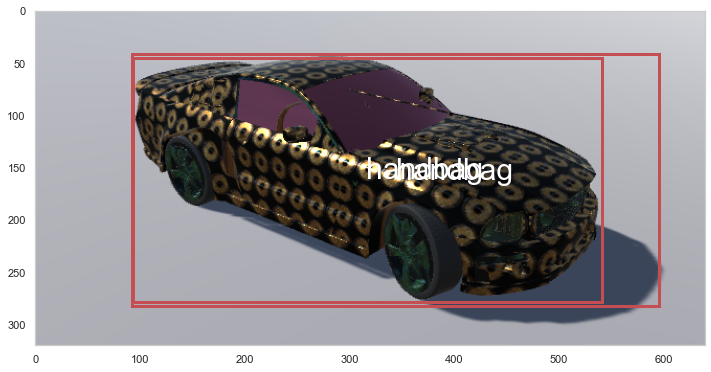

In [38]:
img = Image.open('Images/car-buckle.png')
do_detr_detection(img)